<a href="https://colab.research.google.com/github/kartikay89/Data-Analysis/blob/main/Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YouTube Data Analytics**

Source:
 1. https://www.kaggle.com/datasnaek/youtube-new?select=DEvideos.csv

 Google API:
 1. https://github.com/googleapis/google-api-python-client

 Youtube API:
 1. https://developers.google.com/youtube/v3/docs/?apix=true
 2. https://developers.google.com/youtube/v3/docs/channels/list

 Documentation:
 1. https://github.com/googleapis/google-api-python-client/blob/master/docs/README.md
 2. https://github.com/googleapis/google-api-python-client/blob/master/docs/start.md

 APIs:
 1. https://github.com/googleapis/google-api-python-client/blob/master/docs/dyn/index.md
 2.https://googleapis.github.io/google-api-python-client/docs/dyn/youtube_v3.html



1.   Use 6(GitHub Docs) > youtube API access in 7.
2.   Choose any paramater(ex: channels()) > search for the same in 3(youtube official doc)

USE parameter from docs to see data.



In [2]:
api_key = '#'

In [4]:
!pip install google-api-python-client

In [5]:
from googleapiclient.discovery import build

In [14]:
youtube = build('youtube', 'v3', developerKey=api_key)
youtube

In [25]:
Channel_stats = []

request = youtube.channels().list(
    part = 'statistics',
    id='UCnWmT6pyJmWtD-dN--8y_kg'
)

response = request.execute()
print(response)
Channel_stats.append(response)

{'kind': 'youtube#channelListResponse', 'etag': '5KCzfz8kfvMoZSYesY1Vnq_74P4', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'AejmAT0lE0-hlp1SHOJXX8ca2Ys', 'id': 'UCnWmT6pyJmWtD-dN--8y_kg', 'statistics': {'viewCount': '46', 'subscriberCount': '0', 'hiddenSubscriberCount': False, 'videoCount': '19'}}]}


In [44]:
ChannelInfo = Channel_stats[0]['items'][0]
ChannelInfo

{'etag': 'AejmAT0lE0-hlp1SHOJXX8ca2Ys',
 'id': 'UCnWmT6pyJmWtD-dN--8y_kg',
 'kind': 'youtube#channel',
 'statistics': {'hiddenSubscriberCount': False,
  'subscriberCount': '0',
  'videoCount': '19',
  'viewCount': '46'}}

In [53]:
ChannelInfoDict = {}

for key, values in ChannelInfo.items():
  print(key, values)
  if key not in ChannelInfoDict:
    ChannelInfoDict[key]=values

kind youtube#channel
etag AejmAT0lE0-hlp1SHOJXX8ca2Ys
id UCnWmT6pyJmWtD-dN--8y_kg
statistics {'viewCount': '46', 'subscriberCount': '0', 'hiddenSubscriberCount': False, 'videoCount': '19'}


In [54]:
ChannelInfoDict['statistics']

{'hiddenSubscriberCount': False,
 'subscriberCount': '0',
 'videoCount': '19',
 'viewCount': '46'}

In [56]:
# UCNSdjX4ry9fICqeObdZPAZQ

requestFB = youtube.channels().list(
    part = 'statistics',
    id='UCNSdjX4ry9fICqeObdZPAZQ'
)

response = requestFB.execute()
print(response)

{'kind': 'youtube#channelListResponse', 'etag': 'cjGe6Oz6NZyR0hIw8d98B4oq9Fc', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'CD-tQpmyqdQousdJ4O9IVt-dN0Q', 'id': 'UCNSdjX4ry9fICqeObdZPAZQ', 'statistics': {'viewCount': '1368665778', 'subscriberCount': '4560000', 'hiddenSubscriberCount': False, 'videoCount': '652'}}]}


**Kaggle Dataset**

In [134]:
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
youtubeDF = pd.read_csv('/content/drive/MyDrive/Google Colab Data /INvideos.csv')
youtubeDF.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [72]:
# Let us first filter the dataset for essential columns for our analysis
filteredYoutubeDF = youtubeDF.filter(['title', 'channel_title', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count'])
filteredYoutubeDF.head()

,title,channel_title,publish_time,views,likes,dislikes,comment_count
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,2017-11-12T12:20:39.000Z,1096327,33966,798,882
1,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,2017-11-13T05:43:56.000Z,590101,735,904,0
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,2017-11-12T15:48:08.000Z,473988,2011,243,149
3,Eruma Saani | Tamil vs English,Eruma Saani,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684
4,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,2017-11-13T01:14:16.000Z,464015,492,293,66


In [113]:
# let us see a particular channel's trend.
YRFDF = filteredYoutubeDF[filteredYoutubeDF['channel_title'] == 'YRF']
print('Records in Yrf DF: ', len(YRFDF))
YRFDFV1 = YRFDF.reset_index()
YRFDFV2 = YRFDFV1.drop(columns=['index'])
YRFDFV2.head()

Records in Yrf DF:  93


,title,channel_title,publish_time,views,likes,dislikes,comment_count
0,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,2017-11-07T06:01:50.000Z,35885754,829362,61195,101117
1,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,2017-11-07T06:01:50.000Z,37533416,853550,62858,102740
2,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,2017-11-07T06:01:50.000Z,38664360,865914,63908,103907
3,Swag Se Swagat Song | Official Teaser | Salman...,YRF,2017-11-20T08:40:48.000Z,1628016,38511,3070,3024
4,Swag Se Swagat Song | Official Teaser | Salman...,YRF,2017-11-20T08:40:48.000Z,2790320,46228,5088,3807


In [119]:
splitData = pd.DataFrame(YRFDFV2.title.str.split("|", expand=True))
splitDataV1 = splitData.rename(columns={0:'Songs'})
splitDataV2 = splitDataV1.drop(columns=[1,2,3,4,5]).reset_index()
splitDataV3 = splitDataV2.drop(columns=['index'])

In [118]:
YRFDFV2['Song']=splitDataV3
YRFDFV3 = YRFDFV2.drop(columns=['title'])
YRFDFV3.head()

,channel_title,publish_time,views,likes,dislikes,comment_count,Song
0,YRF,2017-11-07T06:01:50.000Z,35885754,829362,61195,101117,Tiger Zinda Hai
1,YRF,2017-11-07T06:01:50.000Z,37533416,853550,62858,102740,Tiger Zinda Hai
2,YRF,2017-11-07T06:01:50.000Z,38664360,865914,63908,103907,Tiger Zinda Hai
3,YRF,2017-11-20T08:40:48.000Z,1628016,38511,3070,3024,Swag Se Swagat Song
4,YRF,2017-11-20T08:40:48.000Z,2790320,46228,5088,3807,Swag Se Swagat Song


In [148]:
# songs performance from YRF
duplicatesDrop = YRFDFV3.drop_duplicates(subset=['Song'])

songPerfDF = duplicatesDrop.rename(columns={'Song': ''})
songPerfDFV1 = songPerfDF.set_index(songPerfDF.iloc[:, -1])
songPerfDFV2 = songPerfDFV1.drop(columns=['channel_title', 'publish_time'])
songPerfDFV3 = songPerfDFV2.drop(songPerfDFV2.columns[-1], axis=1)

songPerfDFV3

,views,likes,dislikes,comment_count
,,,,
Tiger Zinda Hai,35885754,829362,61195,101117
Swag Se Swagat Song,1628016,38511,3070,3024
Dil Diyan Gallan Song,15766864,498380,15660,40008
Dil Diyan Gallan - Full Song Audio,4947643,76326,2945,5484
Tiger vs Wolves - Promo,1070885,33231,1648,2509
Zinda Hai Song,3573174,68387,2898,3875
Hichki,6057662,109167,2557,5522
Making of Tiger vs Wolves,1608102,29445,1285,953
Making of Tiger Zinda Hai Trailer,773072,13027,618,622


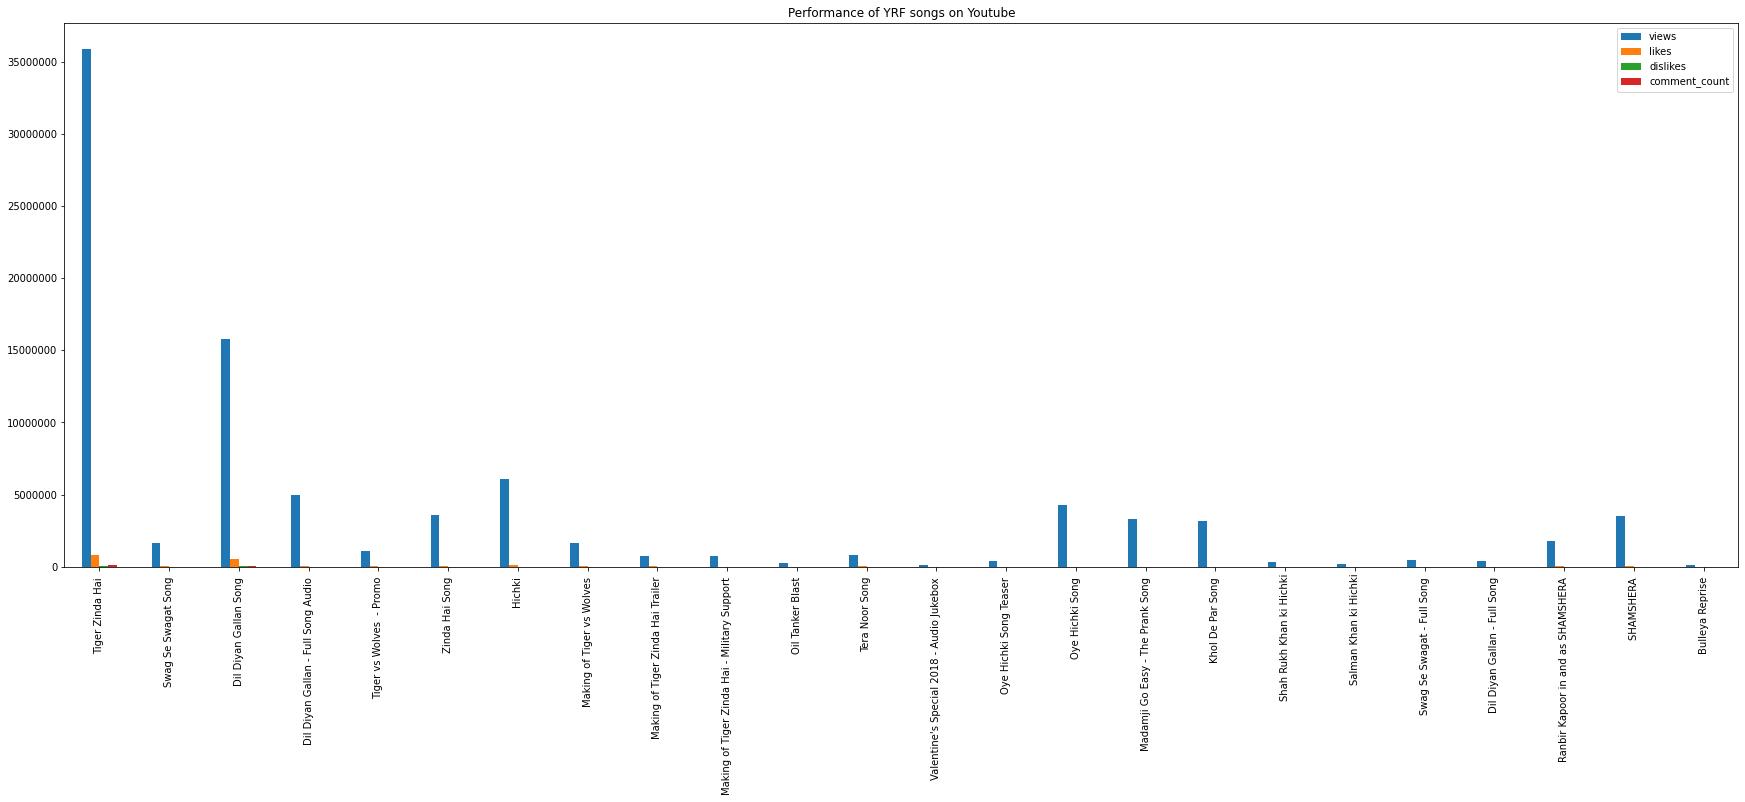

In [149]:
songPerfDFV3.plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Performance of YRF songs on Youtube')
plt.show()